<a href="https://colab.research.google.com/github/zingodev/CMSC320_HW1_sec0201_Git/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2: Data Pre-Processing, exploration and sample statistics

## Importing necessary libaries

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

## Dataframe creation

In [ ]:
# dataframe
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**DataFrame Info**

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

**DataFrame Duplicated**

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

**DataFrame Describe**

In [ ]:
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Discussion about dataframe**: This dataset contains 891 entries and 12 features. Based on the df.info(), only 'Age' column is missing values.  <br>
There are no duplicate rows as indicated by df.duplicated() being equal to number of entries.

**Significance Level Choice**: For all hypothesis testing, we are choosing a significance level α = 0.05.

---

## Data cleaning

In [ ]:
# Convert sex to ints
def str_to_int(val):
    if val == 'male':
        return 0
    elif val == 'female':
        return 1
    else:
        return None
df['Sex'] = df['Sex'].apply(str_to_int)

# Fill MCAR with single imputing (median)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(df['Age'].median())

## Survival vs. Passenger Class

In [ ]:
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2_class, p_class, dof_class, _ = stats.chi2_contingency(contingency_table)
print(contingency_table)
print(f"Chi-square: {chi2_class:.4g}  p-value: {p_class:.4g}")

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-square: 102.9  p-value: 4.549e-23


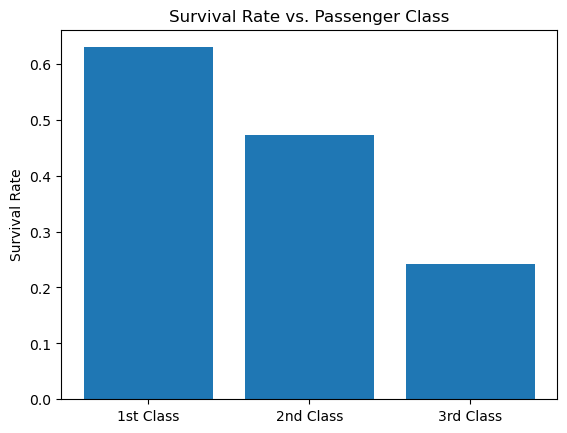

In [ ]:
survive_rate_class = contingency_table[1] / contingency_table.sum(axis=1)
x_values = ["1st Class", "2nd Class", "3rd Class"]
survival = survive_rate_class.values
plt.bar(x_values, survival)
plt.title("Survival Rate vs. Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

From the contigency table, we see that there is a statistically significant relationship between passenger class and survival outcome. There appears to be an association between passenger class and whether a passenger survived the Titanic. First class passengers were much more likely to survive, and this makes logical sense because they had better access to lifeboats and were given priority. The p-value is less than 0.05, meaning we reject the null hypothesis and conclude that passenger class is strongly associated with survival on the Titanic.

In [ ]:
survival_num = contingency_table[1]
total_counts = contingency_table.sum(axis=1)
comparisons = [(1, 2),(1, 3), (2, 3)]
print("Pairwise Z-tests for survival differences between passenger classes:\n")
for i, j in comparisons:
  print("Class "f"{i} vs. Class "f"{j}:")
  survival_btwn_classes = [survival_num[i], survival_num[j]]
  total = [total_counts[i], total_counts[j]]
  z, p = proportions_ztest(survival_btwn_classes, total)
  print(f"Z = {z:.4g}, p-value = {p:.4g}")

Pairwise Z-tests for survival differences between passenger classes:

Class 1 vs. Class 2:
Z = 3.147, p-value = 0.00165
Class 1 vs. Class 3:
Z = 9.878, p-value = 5.21e-23
Class 2 vs. Class 3:
Z = 5.79, p-value = 7.036e-09


All of the p-values are far below 0.05, so we reject the null hypothesis for all comparisons of the passenger classes. So, each difference in survival between the classes (first vs. second, first vs. third, and second vs. third) is statistically significant. So, passenger class was a major factor that influenced survival.

## Survival vs. Passenger Fare

In [ ]:
fare_survived = df[df['Survived'] == 1]['Fare']
fare_died = df[df['Survived'] == 0]['Fare']

# displaying summary statistics for both group
print("----- Survived ----- ")
print(fare_survived.describe())
print("\n\n----- Not Survived ----- ")
print(fare_died.describe())

----- Survived ----- 
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


----- Not Survived ----- 
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


There are only two possible results for survivability: Survived or Died. So, these two groups are independent regarding themselves. <br>
H0: Both groups have no difference in fare  <br>
HA: Both groups have difference in fare

In [ ]:
# unpaired t-test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_died, equal_var=False, alternative = 'two-sided')
print(f"unpaired_t test p_value: {p_value:.4g}")

# mann-whitney u test
u, p_value = stats.mannwhitneyu(fare_survived, fare_died, alternative='two-sided')
print(f"mann-whitney u p value: {p_value:.4g}")

unpaired_t test p_value: 2.699e-11
mann-whitney u p value: 4.553e-22


Based on the unpaired t-test, the p-value is $2.70  \cdot 10^{-11}$ which is much lower than the significance level of 0.05. This means, we reject the null hypothesis meaning there was a signifant difference between survived and not-survived people's fare. On other words, fair did have an effect on the survivibility of the passesgeners.
Since both group has outliers, we decided to do a mann-whitney u test. It also gives the similar conclusion with a p value of $4.55  \cdot 10^{-22}$ which is much lower than significance level of 0.5. So, it similarly suggests that fair did have an effect on the survivibility of the passesgeners.

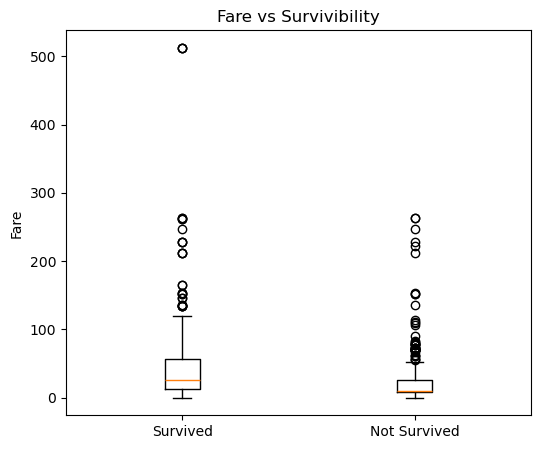

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot([fare_survived, fare_died], tick_labels = ['Survived', 'Not Survived'])
plt.title("Fare vs Survivibility")
plt.ylabel("Fare")
plt.show()

## Survival vs. Sex

Sex         0    1
Survived          
0         468   81
1         109  233


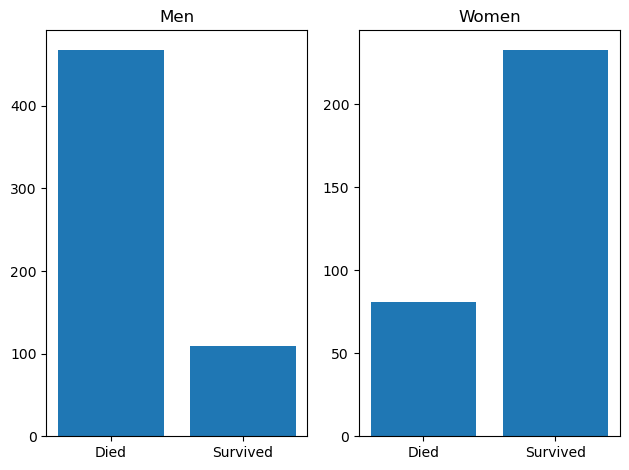

In [ ]:
contingency = pd.crosstab(df['Survived'], df['Sex'])
print(contingency)
fig, (a1, a2) = plt.subplots(1, 2)
a1.bar(['Died', 'Survived'], contingency[0])
a1.set_title("Men")
a2.bar(['Died', 'Survived'], contingency[1])
a2.set_title("Women")
fig.tight_layout()

The easiest test we can perform here is a simple chi-squared test. However, because our table is so small (2x2), we need to apply Yate's correction for continuity, which brings each observation 0.5 closer to the expected frequency before squaring when it computes the chi-squared test statistic. Thankfully, Scipy automatically detects and performs this correction for us:

In [ ]:
chi2 = stats.chi2_contingency(contingency)
print("Chi-squared test with Yate's correction for continuity:")
print(f"Chi-squared test statistic: {chi2.statistic: .4g}")
print(f"p-value: {chi2.pvalue: .4g}")

Chi-squared test with Yate's correction for continuity:
Chi-squared test statistic:  260.7
p-value:  1.197e-58


Our resulting p-value of $1.197 \cdot 10^{-58}$ is clearly less than our significance level of 0.05.

Because our sample size is so small, it's worth additionally performing Fisher's exact test, a statistical test usually reserved for small contingency tables known for being particularly conservative regarding the p-value:

In [ ]:
fisher_exact_result = stats.fisher_exact(contingency, alternative="two-sided")
print("Fisher's exact test:")
print(f"Prior odds ratio: {fisher_exact_result.statistic:.4g}")
print(f"P-value: {fisher_exact_result.pvalue: .4g}")

Fisher's exact test:
Prior odds ratio: 12.35
P-value:  6.464e-60


Note that, even using Fisher's exact test, we still obtain a p-value of $6.464 \cdot 10^{-60}$ significantly below our significance level of 0.05. There is clearly substantial evidence that the distribution of passengers who survived vs. died is not the same between men and women on the Titanic, which makes sense as women and children were given priority when boarding lifeboats.


## Survival vs. # siblings/spouses

In [ ]:
sibsp_table = pd.crosstab(df['SibSp'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(sibsp_table)
print("SibSp vs Survived")
print(f"Chi2: {chi2:.4g}", f"p-value: {p:.4g}")
print("Contingency Table:\n", sibsp_table, "\n")


SibSp vs Survived
Chi2: 37.27 p-value: 1.559e-06
Contingency Table:
 Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0 



From the contingency table, we see that there is a statistically significant relationship between the number of siblings/spouses aboard and survival outcome. Passengers with less siblings and spouses (SibSp is lower) had a lower chance of dying and higher chance of surviving compared to those with larger families. The Chi-squared test gives a p-value of approximately $1.56 \cdot 10^{-6}$, which is far below 0.05. This means we reject the null hypothesis and conclude that SibSp is significantly associated with survival on the Titanic. It makes sense logically, as passengers with very large families may have had more difficulty escaping in time.

## Survival vs. # parents/children

In [ ]:
parch_table = pd.crosstab(df['Parch'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(parch_table)
print("Parch vs Survived")
print(f"Chi2: {chi2:.4g}", f"p-value: {p:.4g}")
print("Contingency Table:\n", parch_table, "\n")

Parch vs Survived
Chi2: 27.93 p-value: 9.704e-05
Contingency Table:
 Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0 



From the contingency table, we see that there is a statistically significant relationship between the number of parents/children aboard and survival outcome. Passengers traveling with fewer parents or children generally had a higher chance of surviving, whereas those with larger numbers of relatives were less likely to survive. The Chi-squared test gives a p-value of approximately $9.7 \cdot 10^{-5}$, which is below 0.05, so we reject the null hypothesis. This suggests that traveling with many dependents may have made it more difficult to escape in time, impacting survival.


## Survival vs. Age

In [ ]:
age_survived = df[df["Survived"] == 1]["Age"]
age_not_survived = df[df["Survived"] == 0]["Age"]
# displaying summary statistics for both group
print("----- Survived ----- ")
print(age_survived.describe())
print("\n\n----- Not Survived ----- ")
print(age_not_survived.describe())

----- Survived ----- 
count    342.000000
mean      28.291433
std       13.764425
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


----- Not Survived ----- 
count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64


H0: There is no meaningful difference between ages of those that survived and those that didn't.

HA: There is a meaningful difference between ages of those that survived and those that didn't.

In [ ]:
# unpaired t-test
t_stat, p_value = stats.ttest_ind(age_survived, age_not_survived, equal_var=False, alternative = 'two-sided')
print(f"unpaired_t test p_value: {p_value:.4g}")
# mann-whitney u test
u, p_value = stats.mannwhitneyu(fare_survived, age_not_survived, alternative='two-sided')
print(f"mann-whitney u p value: {p_value:.4g}")

unpaired_t test p_value: 0.05831
mann-whitney u p value: 0.03985


The Mann-Whitney test gave a p-value of $3.99 \cdot 10^{-2}$, which is under our significance level of .05. We reject the null hypothesis, suggesting statistically significant differences between the age distributions of survivors vs non-survivors.
However, the t-test had a p-value of $5.83 \cdot 10^{-2}$, which is over our significance level of .05, meaning we fail to reject the null hypothesis. This suggests that there is no statistical significance between the mean ages of those who survived and those who didn't
So, the averages may be similar, but the distributions of survivors' vs. non-survivors' age is different. We reject the null hypothesis based on the Mann-Whitney U test, but fail to reject it based on the t-test.

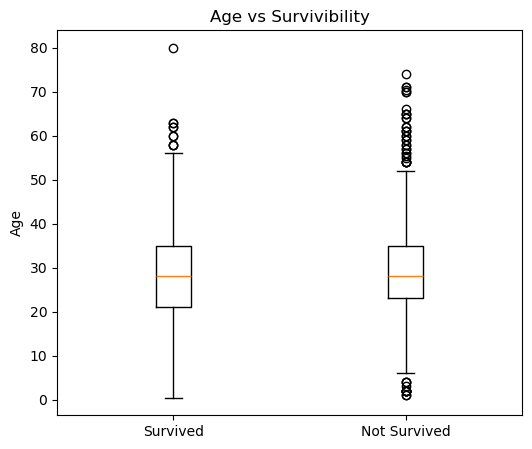

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot([age_survived, age_not_survived], tick_labels = ['Survived', 'Not Survived'])
plt.title("Age vs Survivibility")
plt.ylabel("Age")
plt.show()

# Model Selection

For our primary analysis, we have chosen to use a supervised classification model. Specifically, Logistic Regression to predict if a particular passenger survived based on their provided characteristics.

Our target variable, Survived, is a binary value. This means using regression for a continuous value wouldn’t fit because this target variable better aligns with a classification problem. An unsupervised approach, like clustering, would reveal certain patterns but would not answer the question of whether a passenger survived directly. So, with the existence of pre-labeled data for the outcome of each passenger, using a supervised classification approach makes the most sense.

There are several options for classification models, but logistic regression is a great fit for several reasons

- Models the probability of a binary event, such as survived or died. We are then able to tune the probability threshold to balance the number of fall positives vs. false negatives.
- Our exploratory data analysis shows several features that have strong relationships with whether a passenger survived or not. These include Passenger Class, Gender, and Age. Logistic regression can handle multiple encoded categorical variables and continuous values relatively well.
- Logistic regression is very interpretable and allows us to both classify passengers and also understand the underlying factors that contribute to survivability.

These reasons make logistic regression an appropriate option to solve our classification problem.

